In [60]:
import cv2 as cv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from mtcnn.mtcnn import MTCNN

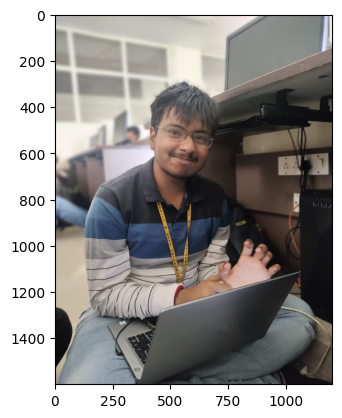

In [61]:
img = cv.imread(r"C:\Users\Ankush Hegde\Downloads\WhatsApp Image 2023-03-31 at 9.25.11 AM.jpeg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)


In [62]:
detector = MTCNN()
results = detector.detect_faces(img)
x,y,w,h = results[0]['box']

1/1 [==============================] - 0s 132ms/step


In [63]:
results

[{'box': [440, 413, 233, 283],
  'confidence': 0.9999984502792358,
  'keypoints': {'left_eye': (523, 513),
   'right_eye': (627, 534),
   'nose': (575, 583),
   'mouth_left': (507, 608),
   'mouth_right': (607, 630)}}]

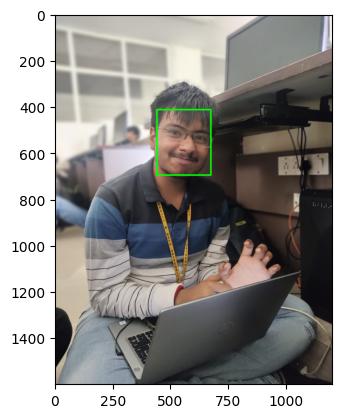

In [64]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 5)
plt.imshow(img)

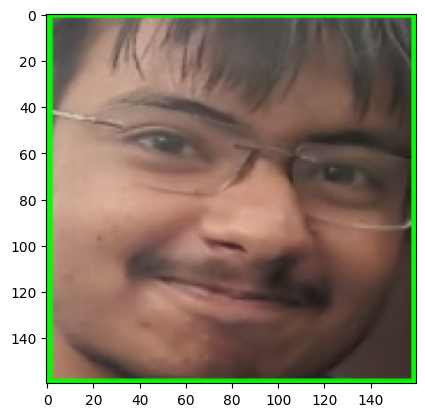

In [65]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [66]:

class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [67]:
faceloading = FACELOADING(r"C:\Users\Ankush Hegde\Desktop\My projects\Kavach Hackathon\Programs\face recognition\face_dataset\lfw-deepfunneled\test folder")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 97ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 19ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 20ms/step
Loaded successfully: 4
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 2
1/1 [==============================] - 0s 19ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 20ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 20ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 21ms/step
Loaded successfully: 2
1/1 [==============================] - 0s 20ms/step
Loaded successfully: 4
1/1 [====================

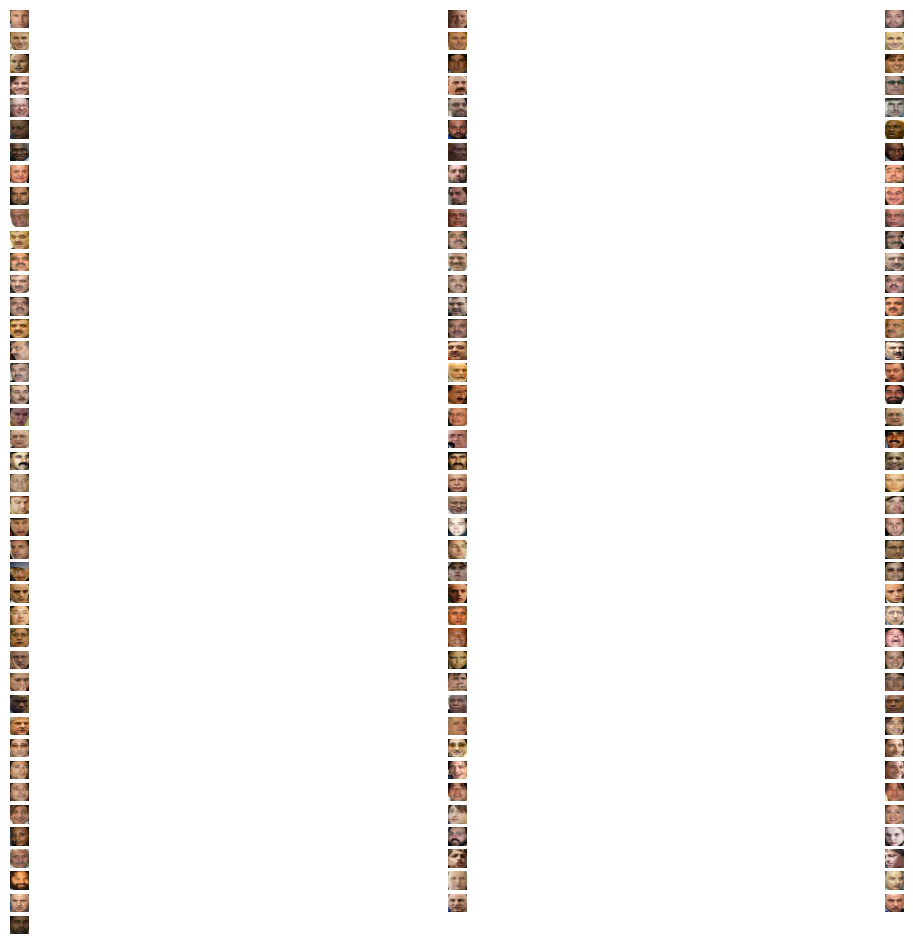

In [68]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

In [75]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embeddings(faces):
    faces = faces.astype('float32')
    faces = np.expand_dims(faces, axis=0)
    yhat = embedder.embeddings(faces)
    return yhat[0]

In [76]:
EMBEDDED_X = []
for face in X:
    EMBEDDED_X.append(get_embeddings(face))
    
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 120ms/step


In [77]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '0')

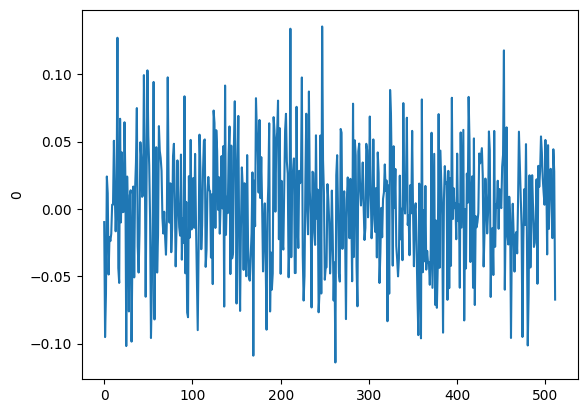

In [79]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [81]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [82]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [83]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

0.946236559139785

In [85]:
accuracy_score(Y_test,ypreds_test)

0.41935483870967744

In [105]:
t_im = cv.imread(r"C:\Users\Ankush Hegde\Downloads\R.jfif")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 30ms/step


In [106]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embeddings(t_im)

1/1 [==============================] - 0s 121ms/step


In [107]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [108]:
ypreds

array([39])

In [109]:
encoder.inverse_transform(ypreds)

array(['Adolfo_Aguilar_Zinser'], dtype='<U28')